# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[ 6, 30, 82, ..., 33, 13, 58],
       [99, 78, 81, ..., 49, 61, 50],
       [11, 97, 18, ..., 25, 89, 21],
       ...,
       [75, 14, 64, ...,  2, 59, 80],
       [97,  8, 32, ..., 19, 38, 46],
       [16,  8, 86, ..., 20, 72, 21]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [6]:
B = np.transpose(np.random.permutation(np.transpose(A)))
B

array([[81, 62, 31, ...,  5, 99,  3],
       [36, 67, 60, ..., 57, 19, 61],
       [49, 20, 50, ..., 69, 68, 87],
       ...,
       [19, 55,  6, ..., 70, 74, 65],
       [84, 82, 20, ..., 61, 63, 99],
       [83, 54, 68, ..., 67, 52,  6]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [7]:
C = A[A[:,::2].sum(axis=1) > A[:,1::2].mean()]
C

array([[ 6, 30, 82, ..., 33, 13, 58],
       [99, 78, 81, ..., 49, 61, 50],
       [11, 97, 18, ..., 25, 89, 21],
       ...,
       [75, 14, 64, ...,  2, 59, 80],
       [97,  8, 32, ..., 19, 38, 46],
       [16,  8, 86, ..., 20, 72, 21]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [8]:
i = np.argmax(np.max(A, axis=1) - np.min(A, axis=1))
i

5

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [9]:
D = np.argsort(A.reshape(1, len(A)*len(A[0]))).reshape(len(A),len(A[0])) + 1
D

array([[9014, 7766, 5924, ..., 2716, 9562, 5633],
       [9240, 9582, 9587, ..., 9835, 7959, 8180],
       [4148, 4951, 8451, ..., 3253, 6344, 6293],
       ...,
       [7509, 6232, 1170, ..., 1210, 3398, 5636],
       [6384, 4697, 4443, ..., 5278, 5282, 8939],
       [8953,  582, 8973, ..., 9269, 8736, 6447]])

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массив, в каждой строке которого максимальный элемент равен $1$, минимальный - $0$. 

In [10]:
E = (A - A.min(axis=1)[:1]) / (A.max(axis=1)[:1] - A.min(axis=1)[:1])
E

array([[0.05102041, 0.29591837, 0.82653061, ..., 0.32653061, 0.12244898,
        0.58163265],
       [1.        , 0.78571429, 0.81632653, ..., 0.48979592, 0.6122449 ,
        0.5       ],
       [0.10204082, 0.97959184, 0.17346939, ..., 0.24489796, 0.89795918,
        0.20408163],
       ...,
       [0.75510204, 0.13265306, 0.64285714, ..., 0.01020408, 0.59183673,
        0.80612245],
       [0.97959184, 0.07142857, 0.31632653, ..., 0.18367347, 0.37755102,
        0.45918367],
       [0.15306122, 0.07142857, 0.86734694, ..., 0.19387755, 0.7244898 ,
        0.20408163]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [11]:
c = np.arange(1, 11).reshape((-1, 1, 1))   # shape: (10, 1, 1)
A * c   # shape: (200, 50) * (10, 1, 1) = (1, 200, 50) * (10, 1, 1) = (10, 200, 50)

array([[[  6,  30,  82, ...,  33,  13,  58],
        [ 99,  78,  81, ...,  49,  61,  50],
        [ 11,  97,  18, ...,  25,  89,  21],
        ...,
        [ 75,  14,  64, ...,   2,  59,  80],
        [ 97,   8,  32, ...,  19,  38,  46],
        [ 16,   8,  86, ...,  20,  72,  21]],

       [[ 12,  60, 164, ...,  66,  26, 116],
        [198, 156, 162, ...,  98, 122, 100],
        [ 22, 194,  36, ...,  50, 178,  42],
        ...,
        [150,  28, 128, ...,   4, 118, 160],
        [194,  16,  64, ...,  38,  76,  92],
        [ 32,  16, 172, ...,  40, 144,  42]],

       [[ 18,  90, 246, ...,  99,  39, 174],
        [297, 234, 243, ..., 147, 183, 150],
        [ 33, 291,  54, ...,  75, 267,  63],
        ...,
        [225,  42, 192, ...,   6, 177, 240],
        [291,  24,  96, ...,  57, 114, 138],
        [ 48,  24, 258, ...,  60, 216,  63]],

       ...,

       [[ 48, 240, 656, ..., 264, 104, 464],
        [792, 624, 648, ..., 392, 488, 400],
        [ 88, 776, 144, ..., 200, 712, 168

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [12]:
a1 = A[:,1::2]
a1
a2 = A[:,0::2]
F = np.concatenate((a2, a1), axis=1)
F

array([[ 6, 82, 14, ...,  3, 33, 58],
       [99, 81, 83, ..., 61, 49, 50],
       [11, 18, 82, ..., 87, 25, 21],
       ...,
       [75, 64, 87, ..., 65,  2, 80],
       [97, 32, 97, ..., 99, 19, 46],
       [16, 86,  3, ...,  6, 20, 21]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [13]:
len(A[np.all(A > 5, axis=1)])

7

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [14]:
np.mean(np.split(A, 10), axis=0)

array([[40.1, 61.4, 52.3, 50.3, 37.5, 63.7, 46.3, 49.9, 56.2, 51.1, 53.7,
        50.3, 54.9, 46.3, 45.8, 61. , 58.8, 60.9, 47.7, 29.1, 43.4, 62.4,
        51.9, 64.1, 61.3, 55.7, 53.9, 65.4, 47.4, 33.3, 53.1, 51.4, 45.6,
        59.8, 42.5, 42.6, 44.8, 36.5, 47.1, 53.1, 35.6, 39.2, 54.8, 49.6,
        44. , 59.4, 50.4, 54.6, 54.9, 56.1],
       [68.4, 56.7, 55. , 47.4, 35.6, 40.9, 68.3, 55. , 48.2, 52. , 43.7,
        49.1, 44.5, 60.6, 48.4, 48.9, 66.8, 48.3, 38.9, 50.1, 63.2, 54.8,
        37. , 47.8, 57.1, 34.1, 35.4, 49.6, 49.1, 43.1, 46.5, 52.6, 40.7,
        62. , 39.6, 52. , 40.2, 46.1, 44.9, 64.4, 33.4, 57.9, 52.9, 42. ,
        57.1, 47.1, 53.2, 39.8, 47.6, 49.4],
       [42.5, 42.5, 38.9, 46. , 45. , 57.4, 48.9, 43.3, 56.6, 48.7, 36.2,
        58.5, 59.9, 52.1, 40.7, 39.4, 55.8, 51.8, 50.6, 52.6, 39.9, 40.6,
        46.3, 46.7, 44.3, 48.2, 72.4, 51.8, 48.5, 46.6, 49.8, 50.9, 55.9,
        46.2, 56. , 33.7, 67.1, 61. , 59.3, 31.4, 49.6, 46.6, 56.5, 43.6,
        60. , 53.7, 45

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [15]:
_, ind = np.unique(A, return_index=True)
J = A.reshape((1, len(A) * len(A[0])))
J[0][np.sort(ind)]  

array([ 6, 30, 82, 81, 14, 78, 38, 32, 31, 10, 69, 51, 98, 45, 91, 62, 43,
       84,  1, 50, 57, 99, 77, 18, 76, 96, 89,  5, 20, 28, 41, 60,  4, 23,
       48, 34, 25,  3, 49, 33, 13, 58, 36, 83, 64, 53, 17, 67, 70, 68, 19,
       26, 21,  9, 85, 74, 88, 72,  7, 35, 73, 61, 11, 97, 24, 55, 27, 56,
       71, 79, 90, 29, 86, 94, 87, 93, 75, 42, 66, 12, 95,  8, 65, 15, 80,
       46, 52, 47,  2,  0, 39, 40, 54, 37, 59, 92, 22, 16, 63, 44])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [16]:
np.linalg.norm(A - np.mean(A, axis=0), axis=1)

array([211.48725452, 181.13635423, 187.0787236 , 192.56442772,
       188.64058107, 218.02460601, 203.69953074, 200.99151431,
       203.49174142, 229.25673125, 203.84255891, 216.60849204,
       212.85670961, 197.09809442, 228.05025504, 181.78294426,
       227.6657612 , 209.21182764, 202.82363971, 205.47882817,
       211.78129952, 205.66698526, 211.99195462, 198.2459806 ,
       198.51538687, 198.78485562, 202.38023329, 206.44059394,
       216.39828748, 205.80626527, 172.54448361, 216.63787486,
       193.23252528, 208.65226772, 207.95198683, 217.87305668,
       200.75340302, 182.96387301, 230.43098495, 233.13152688,
       211.08078744, 181.046013  , 187.91646768, 194.2166286 ,
       203.20757571, 212.50211487, 204.41927215, 206.61212168,
       205.48739335, 209.34296937, 230.71733534, 215.23605373,
       190.77787824, 200.54929276, 196.50775767, 200.05833855,
       202.47876142, 212.19068977, 217.48277823, 216.23239541,
       207.00823371, 212.45643983, 201.43321182, 201.07

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [17]:
np.where(A < 50, 2 * A, 3 * A)

array([[ 12,  60, 246, ...,  66,  26, 174],
       [297, 234, 243, ...,  98, 183, 150],
       [ 22, 291,  36, ...,  50, 267,  42],
       ...,
       [225,  28, 192, ...,   4, 177, 240],
       [291,  16,  64, ...,  38,  76,  92],
       [ 32,  16, 258, ...,  40, 216,  42]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [18]:
def moving_average(arr:np.ndarray, window_size: int) -> np.ndarray:
    return np.convolve(arr[0], np.ones(window_size) / window_size, mode='valid') 
    
V = A.reshape((1, len(A) * len(A[0])))
V3 = moving_average(V, 3)
V5 = moving_average(V, 5)
V10 = moving_average(V, 10)

V5 = np.concatenate((V5,  np.zeros(V3.shape[0] - V5.shape[0])))
V10 = np.concatenate((V10,  np.zeros(V3.shape[0] - V10.shape[0])))
V3 + V5 + V10

array([122.13333333, 167.83333333, 166.2       , ...,  59.13333333,
        47.33333333,  37.66666667])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

Optimization terminated successfully.
         Current function value: -4.882074
         Iterations: 6
         Function evaluations: 16
         Gradient evaluations: 8


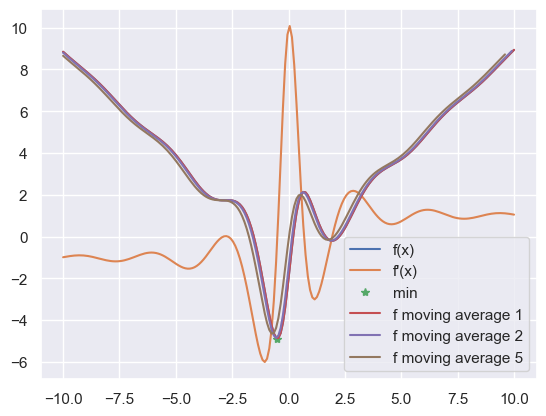

In [19]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from scipy.misc import derivative
from typing import Union, Callable


def f(x: np.ndarray) -> np.ndarray:
    return (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)

def df(f: Callable[[np.ndarray], np.ndarray], x: np.ndarray) -> np.ndarray:
    return derivative(f, x, dx=1e-6)


x = np.linspace(-10, 10, 200)  # (-10, 10, 1000)
y = f(x) ## (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)
dy = df(f, x)

# print(y)

plt.plot(x, y, label='f(x)')
plt.plot(x, dy, label='f\'(x)')

min_f_p = scipy.optimize.fmin_bfgs(f, 0, full_output=True)
x_min, y_min = min_f_p[0][0], min_f_p[1]
plt.plot(x_min, y_min, '*', label='min ') 

Y = y.reshape((1, len(x)))
m_a_1 = moving_average(Y, 1)
m_a_2 = moving_average(Y, 2)
m_a_5 = moving_average(Y, 5)

plt.plot(x, m_a_1, label='f moving average 1')  # ?
plt.plot(x[:len(m_a_2)], m_a_2, label='f moving average 2')
plt.plot(x[:len(m_a_5)], m_a_5, label='f moving average 5')

plt.legend()
plt.show()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [20]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1    
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[4, 3, 3, 0, 4]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [41]:
def sample_np(x: np.ndarray, c: int) -> np.ndarray:
    assert len(x) > 0
    
    s = np.sum(x)
    val = s * np.random.random(size=c)
    cur = np.cumsum(x)
    idx = np.searchsorted(cur, val)
    return idx

sample_np(np.array([50, 3, 1, 7, 20]), 5)


array([0, 0, 4, 0, 3])

In [45]:
def numpy_sample(x: np.ndarray, c: int) -> np.ndarray:
    assert len(x) > 0
    return np.random.choice(np.arange(len(x)), size=c, p=x/np.sum(x))

numpy_sample(np.array([50, 3, 1, 7, 20]), 5)

array([0, 0, 0, 0, 4])

In [ ]:
# realize statistic tests

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [23]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

2172

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

In [24]:
import timeit 

In [25]:
def walk_np(n: int) -> int:
    return np.sum(np.random.choice([-3, -1, 0, 2, 3], size=n))

walk_np(10_000)

2275

In [26]:
print("Function walk: ", timeit.timeit('walk(10000)', globals=globals(), number=1000))
print("Function walk_np: ", timeit.timeit('walk_np(10000)', globals=globals(), number=1000))

Function walk:  4.43715145799797
Function walk_np:  0.16636750000179745


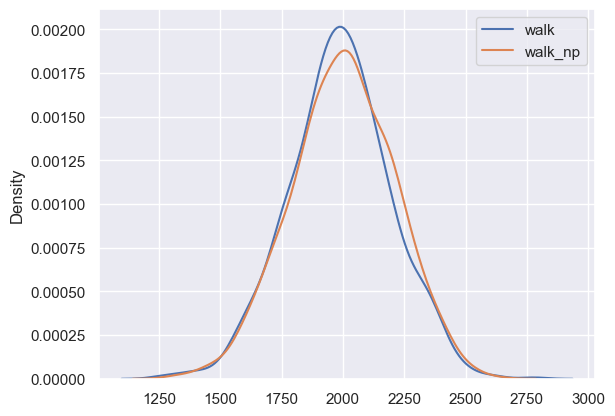

In [27]:
walk_values = [walk(10000) for _ in range(1000)]
walk_np_values = [walk_np(10000) for _ in range(1000)]
sns.kdeplot(walk_values, label='walk')
sns.kdeplot(walk_np_values, label='walk_np')
plt.legend()
plt.show()


In [49]:
%timeit walk(100000)

44 ms ± 479 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [50]:
%timeit walk_np(100000)

1.52 ms ± 6.37 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [51]:
4.45*1000/168, 44/1.52

(26.488095238095237, 28.94736842105263)

Производительность увеличилась в несколько (~26-29) раз. 

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [28]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


1.1967797043071207

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [29]:
from numba import njit

strange_conv_numba = njit(strange_conv)

a = np.random.random((10000, 10000))
strange_conv_numba(a)

0.6284409600939949

In [30]:
import cython

In [31]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [32]:
%%cython

cimport numpy

def strange_conv_cython(numpy.ndarray['double', ndim=2] a):
    cdef int x = a.shape[0]
    cdef int y = a.shape[1]

    cdef double t = 1.
    cdef double c = 0.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


In [38]:
%timeit strange_conv(a)

12.4 s ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%timeit strange_conv_numba(a)

28.3 ms ± 76.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
%timeit strange_conv_cython(a)

42.3 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Производительность с помощью Numba улучшается в ~438 раз, производительность с Cython больше в 293 раз

In [40]:
print(12.4*1000/28.3,12.4*1000/42.3)

438.1625441696113 293.1442080378251
